
# Tarea N°02
## Instrucciones
1.- Completa tus datos personales (nombre y rol USM) en siguiente celda.

**Nombre**: Gonzalo Gallardo Urrutia

**Rol**: 201741523-1

2.- Debes pushear este archivo con tus cambios a tu repositorio personal del curso, incluyendo datos, imágenes, scripts, etc.

3.- Se evaluará:

- Soluciones
- Código
- Que Binder esté bien configurado.
- Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

## I.- Clasificación de dígitos


En este laboratorio realizaremos el trabajo de reconocer un dígito a partir de una imagen.


![rgb](https://www.wolfram.com/language/11/neural-networks/assets.en/digit-classification/smallthumb_1.png)

El objetivo es a partir de los datos, hacer la mejor predicción de cada imagen. Para ellos es necesario realizar los pasos clásicos de un proyecto de _Machine Learning_, como estadística descriptiva, visualización y preprocesamiento. 

* Se solicita ajustar al menos tres modelos de clasificación:
 * Regresión logística
 * K-Nearest Neighbours 
 * Uno o más algoritmos a su elección [link](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) (es obligación escoger un _estimator_ que tenga por lo menos un hiperparámetro). 
 
 
* En los modelos que posean hiperparámetros es mandatorio buscar el/los mejores con alguna técnica disponible en `scikit-learn` ([ver más](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator)).
* Para cada modelo, se debe realizar _Cross Validation_ con 10 _folds_ utilizando los datos de entrenamiento con tal de determinar un intervalo de confianza para el _score_ del modelo.
* Realizar una predicción con cada uno de los tres modelos con los datos _test_ y obtener el _score_. 
* Analizar sus métricas de error (**accuracy**, **precision**, **recall**, **f-score**)



### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
digits_dict.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [4]:
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [5]:
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

In [6]:
digits.describe()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


**¿Cómo se distribuyen los datos?**

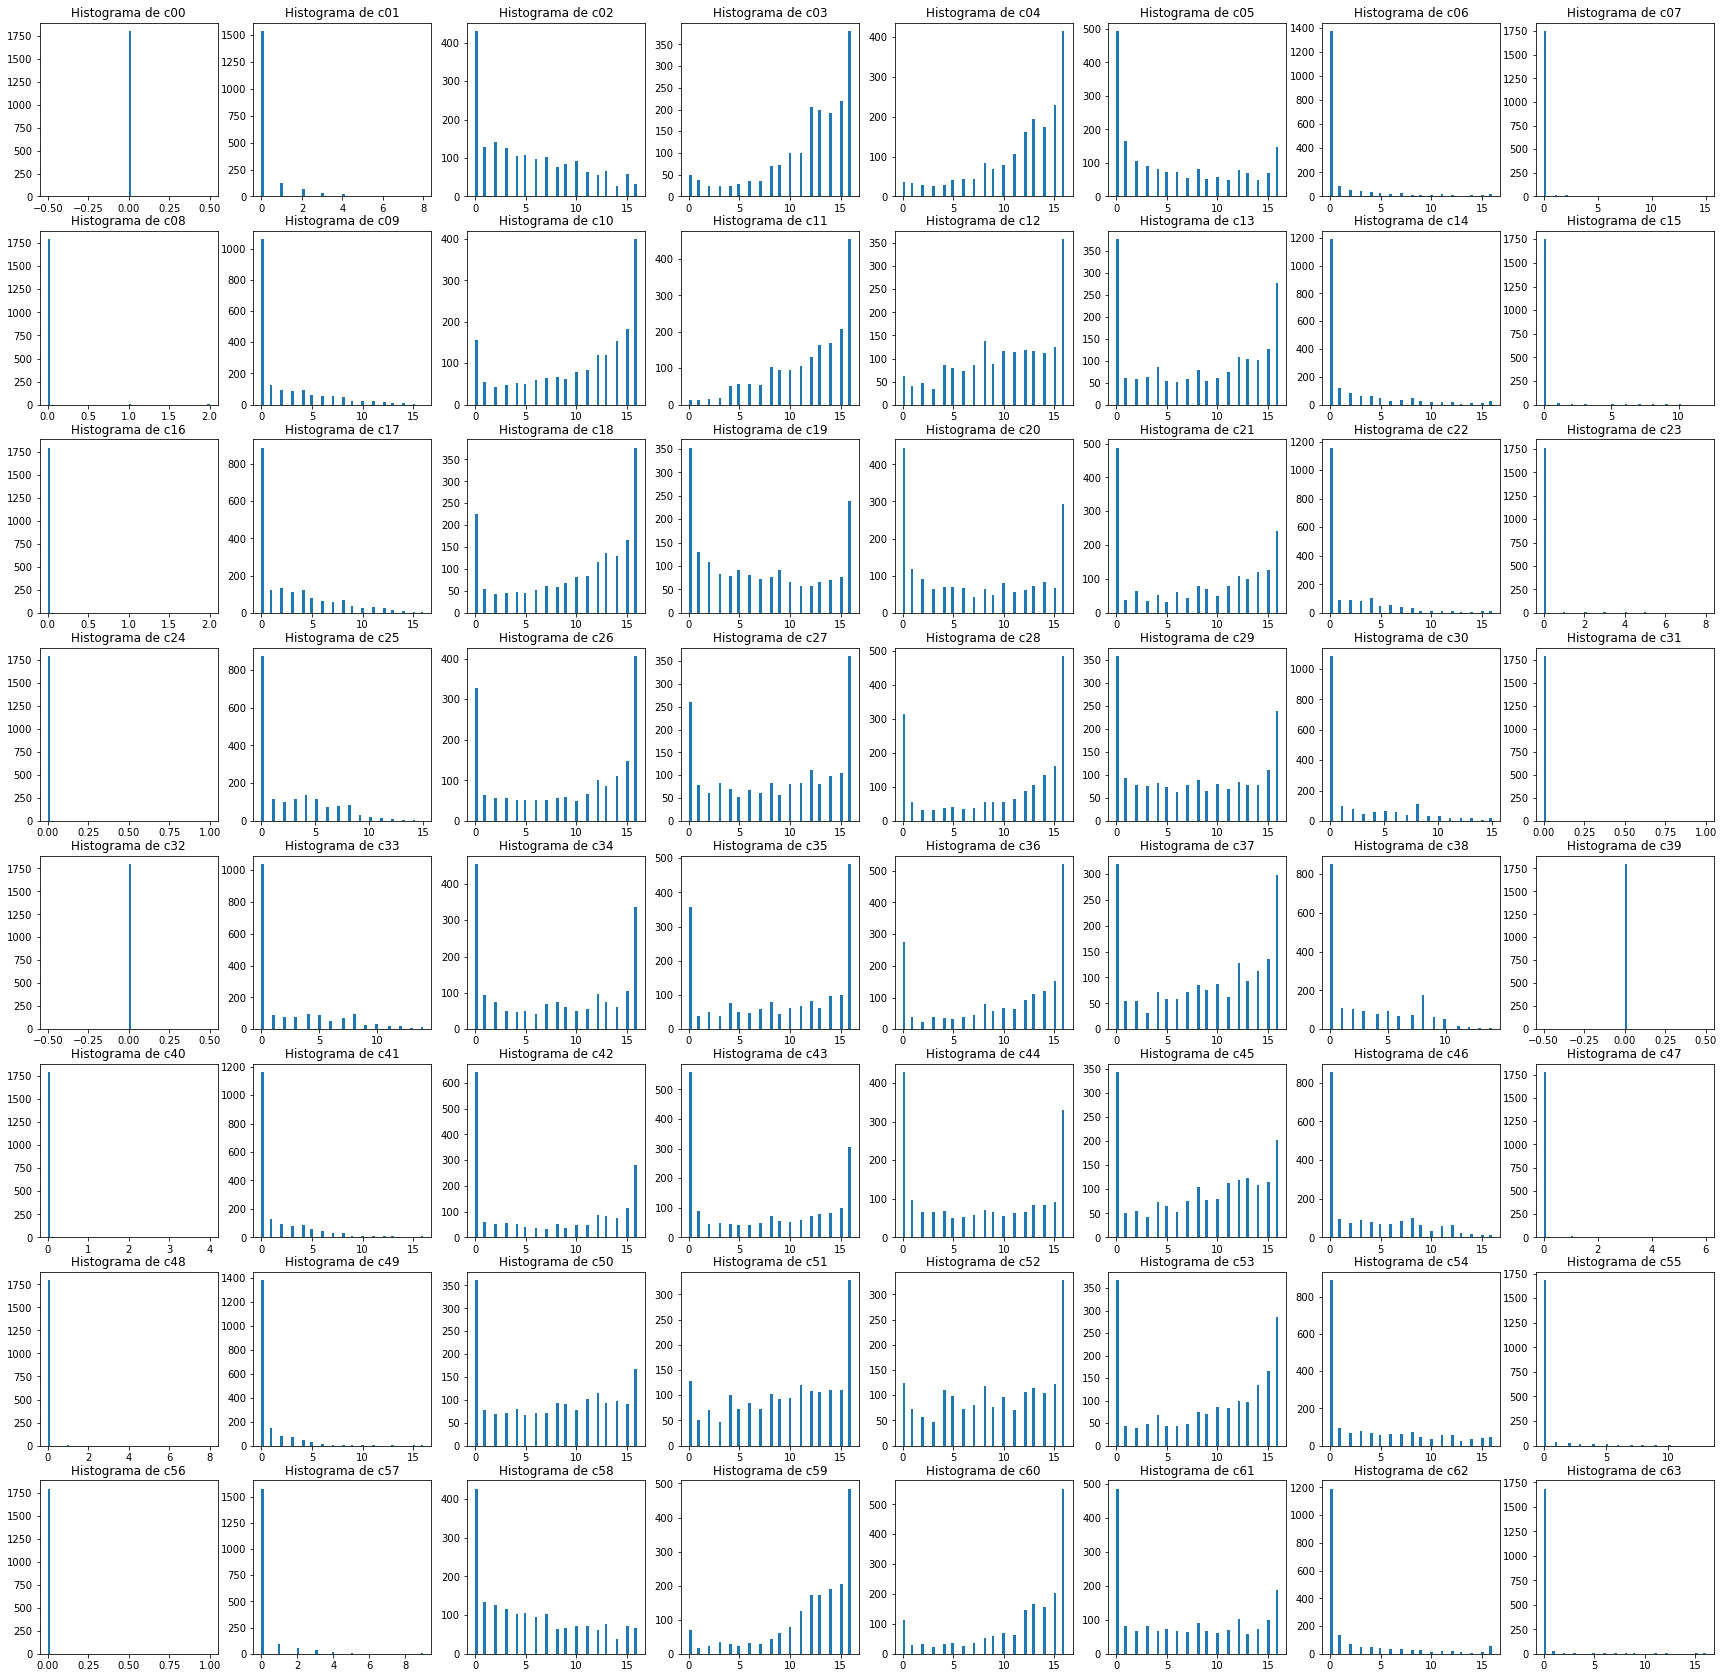

In [7]:
cols = digits.columns
fig = plt.figure(figsize = (30,30))
for i in range(len(cols)-1):
    plt.subplot(8,8,i+1)
    plt.hist(digits[cols[i]], bins=60)
    plt.title("Histograma de "+cols[i])

**¿Cuánta memoria estoy utilizando?**

In [8]:
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   c00     1797 non-null   int32
 1   c01     1797 non-null   int32
 2   c02     1797 non-null   int32
 3   c03     1797 non-null   int32
 4   c04     1797 non-null   int32
 5   c05     1797 non-null   int32
 6   c06     1797 non-null   int32
 7   c07     1797 non-null   int32
 8   c08     1797 non-null   int32
 9   c09     1797 non-null   int32
 10  c10     1797 non-null   int32
 11  c11     1797 non-null   int32
 12  c12     1797 non-null   int32
 13  c13     1797 non-null   int32
 14  c14     1797 non-null   int32
 15  c15     1797 non-null   int32
 16  c16     1797 non-null   int32
 17  c17     1797 non-null   int32
 18  c18     1797 non-null   int32
 19  c19     1797 non-null   int32
 20  c20     1797 non-null   int32
 21  c21     1797 non-null   int32
 22  c22     1797 non-null   int32
 23  c23     1797 

La memoria utilizada es de 456.4 KB

**¿Qué tipo de datos son?**

In [9]:
digits.dtypes.unique()

array([dtype('int32')], dtype=object)

El tipo de dato de las columnas son enteros, esto es, "int"

**¿Cuántos registros por clase hay?**

In [10]:
reg = pd.value_counts(digits.target).to_frame().reset_index().sort_values(by = 'index')
reg.rename(columns = {"index": "Clase", "target": "Registros"}).reset_index(drop = True )

,Clase,Registros
0,0,178
1,1,182
2,2,177
3,3,183
4,4,181
5,5,182
6,6,181
7,7,179
8,8,174
9,9,180


### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [11]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`. 

Sugerencia: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

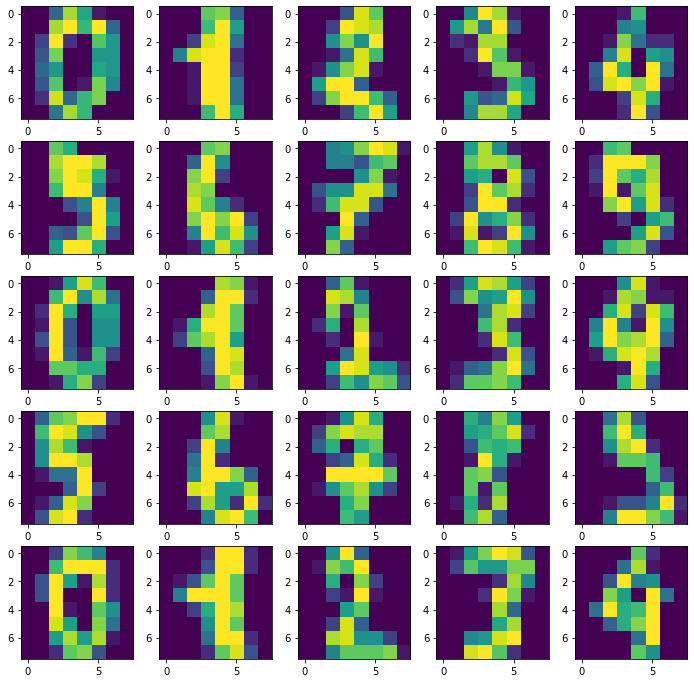

In [12]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))
k=1
for i in range(0,25):
    plt.subplot(5,5,k)
    plt.imshow(digits_dict["images"][i])
    k+=1

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test** 
 * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
 * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
 
 
* **modelo**:
 * Instanciar el modelo objetivo desde la librería sklearn.
 * *Hiper-parámetros*: Utiliza `sklearn.model_selection.GridSearchCV` para obtener la mejor estimación de los parámetros del modelo objetivo.




* **Métricas**:
 * Graficar matriz de confusión.
 * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [13]:
X = digits.drop(columns="target").values
y = digits["target"].values

In [14]:
import metrics_classification as metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import time

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [16]:
print('El train set tiene un total de', len(X_train), 'datos')
print('El test set tiene un total de', len(X_test), 'datos')

El train set tiene un total de 1437 datos
El test set tiene un total de 360 datos


**Logistic Regression**

In [17]:
p_log_reg = {
    'penalty' : ['l1', 'l2'], 
    'C' : [0.1, 1, 10], 
    'solver' : ['liblinear'],
    }
log_reg = LogisticRegression()
log_reg_grid = GridSearchCV(estimator = log_reg, param_grid = p_log_reg, cv = 10)
start = time.time()
log_reg_grid_result = log_reg_grid.fit(X_train, y_train)
time_log_reg = time.time() - start

In [18]:
print("El mejor score tuvo un valor de: %f \n Usando los parámetros: %s"
% (log_reg_grid_result.best_score_, log_reg_grid_result.best_params_))

El mejor score tuvo un valor de: 0.965166 
 Usando los parámetros: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [19]:
y_pred = log_reg_grid.predict(X_test)
df_log_reg = pd.DataFrame({'y': y_test, 'yhat': y_pred})

In [20]:
print("Matriz de confusión:\n",confusion_matrix(y_test,y_pred))

Matriz de confusión:
 [[32  0  0  0  1  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 44  0  1  0  0  0]
 [ 0  0  1  0  0 45  1  0  0  0]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  1  0  0  0  1  0  0 28  0]
 [ 0  1  0  0  0  0  0  0  3 36]]


**K-Nearest Neighbours**

In [21]:
p_knn = {
    'n_neighbors' : [1, 5, 25],
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto','brute', 'kd_tree','ball_tree']    
}
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(estimator = knn, param_grid = p_knn, cv = 10)
startt = time.time()
knn_grid_result = knn_grid.fit(X_train, y_train)
time_knn = time.time() - startt

In [22]:
print("El mejor score tuvo un valor de: %f \n Usando los parámetros: %s"
% (knn_grid_result.best_score_, knn_grid_result.best_params_))

El mejor score tuvo un valor de: 0.988160 
 Usando los parámetros: {'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}


In [23]:
y_pred = knn_grid.predict(X_test)
df_knn = pd.DataFrame({'y': y_test, 'yhat': y_pred})

In [24]:
print("Matriz de confusión:\n",confusion_matrix(y_test,y_pred))

Matriz de confusión:
 [[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  1  0  0  0  0  0  0 28  1]
 [ 0  0  0  1  1  1  0  0  0 37]]


**Decision Tree Classifier**

In [25]:
p_dtreec = {
    'criterion' : ['gini', 'entropy'],
    'splitter' : ['best', 'random'],
    'max_features' : ['auto', 'sqrt', 'log2']
}
dtreec = DecisionTreeClassifier()
dtreec_grid = GridSearchCV(estimator = dtreec, param_grid = p_dtreec, cv = 10)
starttt = time.time()
dtreec_grid_result = dtreec_grid.fit(X_train, y_train)
time_dtreec = time.time() - starttt

In [26]:
print("El mejor score tuvo un valor de: %f \n Usando los parámetros: %s"
% (dtreec_grid_result.best_score_, dtreec_grid_result.best_params_))

El mejor score tuvo un valor de: 0.804473 
 Usando los parámetros: {'criterion': 'entropy', 'max_features': 'sqrt', 'splitter': 'best'}


In [27]:
y_pred = dtreec_grid.predict(X_test)
df_dtreec = pd.DataFrame({'y': y_test, 'yhat': y_pred})

In [28]:
print("Matriz de confusión:\n",confusion_matrix(y_test,y_pred))

Matriz de confusión:
 [[26  0  0  0  2  1  0  0  1  3]
 [ 0 24  0  0  0  0  1  0  3  0]
 [ 0  0 29  3  0  0  0  0  0  1]
 [ 2  0  3 23  0  2  1  0  2  1]
 [ 2  0  0  0 41  0  0  3  0  0]
 [ 0  0  0  2  0 39  1  2  1  2]
 [ 2  0  0  0  0  1 31  0  0  1]
 [ 0  0  0  0  1  0  0 31  0  2]
 [ 0  1  2  0  2  0  0  0 24  1]
 [ 0  1  0  4  2  1  0  0  2 30]]


**¿Cuál modelo es mejor basado en sus métricas?**

In [29]:
print("Métricas del modelo Logistic Regression: \n")
metrics.summary_metrics(df_log_reg)

Métricas del modelo Logistic Regression: 



,accuracy,recall,precision,fscore
0,0.9611,0.963,0.961,0.9614


In [30]:
print("Métricas del modelo K-Nearest Neighbors: \n")
metrics.summary_metrics(df_knn)

Métricas del modelo K-Nearest Neighbors: 



,accuracy,recall,precision,fscore
0,0.9778,0.9786,0.9783,0.9781


In [31]:
print("Métricas del modelo Decision Classifier Tree: \n")
metrics.summary_metrics(df_dtreec)

Métricas del modelo Decision Classifier Tree: 



,accuracy,recall,precision,fscore
0,0.8278,0.8269,0.828,0.8268


Podemos observar que las métricas de cada modelo tienen valores similares entre sí, pero claramente los valores de las métricas del modelo Decision Classifier Tree son menores a las de las otras dos, siendo las del modelo K-Nearest Neighbors ligeramente más cercanas al 1 que las del modelo Logistic Regression.

**¿Cuál modelo demora menos tiempo en ajustarse?**

In [32]:
print(" El modelo Logistic Regression se ajustó en %s segundos" % time_log_reg)

 El modelo Logistic Regression se ajustó en 25.48399829864502 segundos


In [33]:
print(" El modelo K-Nearest Neighbors se ajustó en %s segundos" % time_knn)

 El modelo K-Nearest Neighbors se ajustó en 11.681000471115112 segundos


In [34]:
print(" El modelo Decision Tree Classifier se ajustó en %s segundos" % time_dtreec)

 El modelo Decision Tree Classifier se ajustó en 0.7640001773834229 segundos


Claramente el modelo Decision Tree Classifier es el que demoró menos en ajustarse, le sigue el modelo K-Nearest Neighbors y detrás de éste el modelo Logistic Regression.

**¿Qué modelo escoges?**

A priori me tentaría a elegir el modelo Decision Tree Classifier debido a que es por lejos el que demora menos tiempo en adaptarse, pero sus métricas no son tan buenas como para considerarlo, en cambio, el modelo K-Nearest Neighbors tiene las mejores métricas de los tres modelos y el tiempo que demora en adaptarse es decente, no es tan rápido como el modelo Decision Tree Classifier, pero es más rápido que el modelo Logistic Regression.

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:



 * **Cross validation**: usando **cv** (con n_fold = 10), sacar una especie de "intervalo de confianza" sobre alguna de las métricas estudiadas en clases: 
  * $\mu \pm \sigma$ = promedio $\pm$ desviación estandar
 * **Curva de Validación**: Replica el ejemplo del siguiente [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.
 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from itertools import cycle
import sys

In [36]:
cvs = cross_val_score(estimator = knn_grid, X = X_train, y = y_train, cv = 10)
cvs = [round(x,2) for x in cvs]
print('Precisión promedio: {0: .2f} +/- {1: .2f}'.format(np.mean(cvs),np.std(cvs)*2))

Precisión promedio:  0.99 +/-  0.01


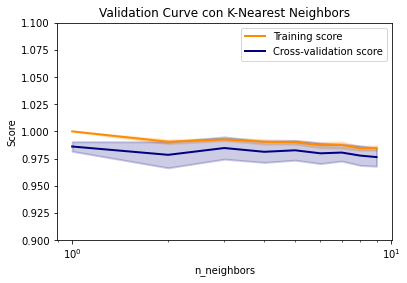

In [37]:
param_range = np.array([i for i in range(1,10)])

train_scores, test_scores = validation_curve(
    KNeighborsClassifier(algorithm = 'auto', weights = 'uniform'), 
    X_train, 
    y_train, 
    param_name = "n_neighbors", 
    param_range = param_range,
    scoring = "accuracy", 
    n_jobs = 1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve con K-Nearest Neighbors")
plt.xlabel("n_neighbors")
plt.ylabel("Score")
plt.ylim(0.9, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")

plt.show()

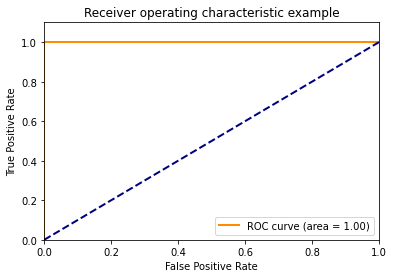

In [38]:
# Binarize the output
y = label_binarize(y, classes = [i for i in range(10)])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
n_samples, n_features = X.shape

# Shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(KNeighborsClassifier(algorithm = 'auto', weights = 'uniform'))
y_score = classifier.fit(X_train, y_train).predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

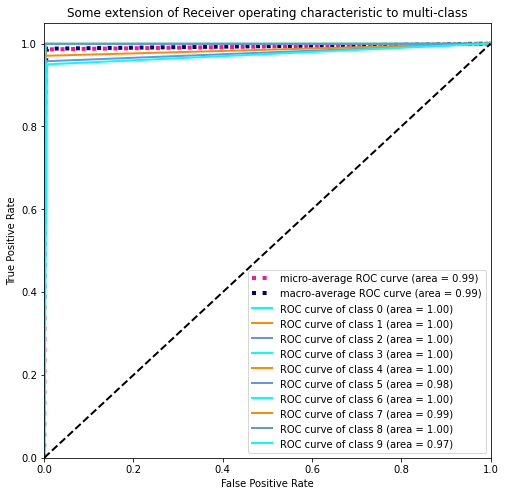

In [39]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize = (8,8))
plt.plot(fpr["micro"], tpr["micro"],
         label = 'micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color = 'deeppink', linestyle = ':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label = 'macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color = 'navy', linestyle = ':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color = color, lw = lw,
             label = 'ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw = lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

### Ejercicio 5
__Reducción de la dimensión:__ Tomando en cuenta el mejor modelo encontrado en el `Ejercicio 3`, debe realizar una redcción de dimensionalidad del conjunto de datos. Para ello debe abordar el problema ocupando los dos criterios visto en clases:  

* **Selección de atributos**
* **Extracción de atributos**

__Preguntas a responder:__

Una vez realizado la reducción de dimensionalidad, debe sacar algunas estadísticas y gráficas comparativas entre el conjunto de datos original y el nuevo conjunto de datos (tamaño del dataset, tiempo de ejecución del modelo, etc.)


In [40]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

**Selección de atributos**

In [41]:
# Separamos las columnas objetivo
x_training = digits.drop(['target','c00','c32','c39'], axis = 1) # Las clases incluidas tienen un valor constante #
y_training = digits['target']

# Aplicando el algoritmo univariante de prueba F.
k = 23  # Número de atributos a seleccionar
columnas = list(x_training.columns.values)
seleccionadas = SelectKBest(f_classif, k=k).fit(x_training, y_training)

In [42]:
catrib = seleccionadas.get_support()
atributos = [columnas[i] for i in list(catrib.nonzero()[0])]
digits[atributos]

,c02,c10,c13,c19,c20,c21,c26,c27,c28,c30,...,c38,c42,c43,c44,c46,c53,c54,c58,c60,c61
0,5,13,15,2,0,11,12,0,0,8,...,8,11,0,1,7,12,0,6,10,0
1,0,0,9,15,16,6,15,16,16,0,...,0,1,16,16,0,6,0,0,16,10
2,0,3,14,13,8,16,1,6,15,0,...,0,16,16,5,0,11,5,0,11,16
3,7,13,4,13,13,0,2,15,11,0,...,1,0,0,1,8,14,9,7,13,9
4,0,0,0,13,6,2,7,15,0,8,...,6,15,16,13,1,10,0,0,16,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,4,16,16,6,3,16,12,16,16,5,...,8,0,0,0,5,16,4,2,15,9
1793,6,16,16,7,0,13,16,0,0,8,...,6,16,7,9,5,16,1,6,14,6
1794,1,13,2,15,10,16,8,16,16,0,...,0,16,14,16,0,16,0,2,13,6
1795,2,14,15,7,3,16,16,10,7,4,...,4,0,0,0,2,16,2,5,16,12


**Extracción de atributos**

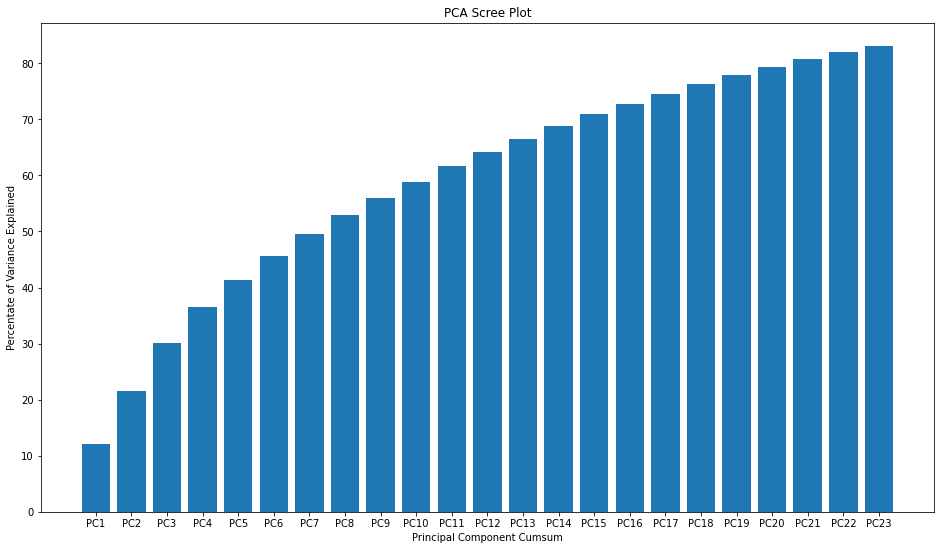

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

x = digits.drop("target", axis = 1).values
y = digits["target"].values

x = StandardScaler().fit_transform(x)

pca = PCA(n_components = 23)
principalComponents = pca.fit_transform(x)

# Graficar varianza por componente
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
percent_variance_cum = np.cumsum(percent_variance)
columns=[f"PC{i}" for i in range(1,24)]

plt.figure(figsize = (16,9))
plt.bar(x = range(1,24), height = percent_variance_cum, tick_label = columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

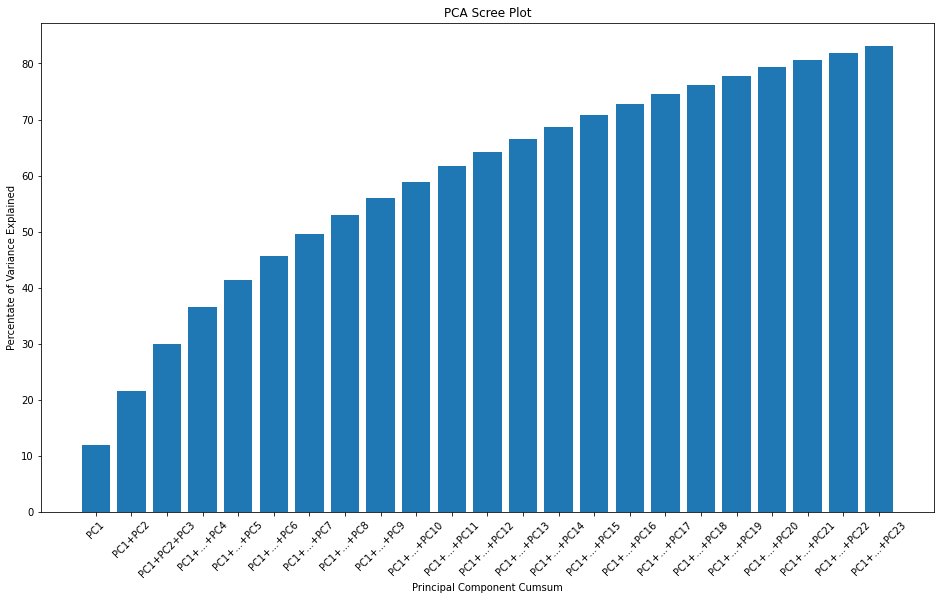

In [44]:
# Graficar varianza por la suma acumulada de los componente
percent_variance_cum = np.cumsum(percent_variance)
columns_sum = ["PC1", "PC1+PC2", "PC1+PC2+PC3"] + [f"PC1+...+PC{i+1}" for i in range(3,23)]

plt.figure(figsize = (16,9))
plt.bar(x = range(1,24), height = percent_variance_cum, tick_label = columns_sum )
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.xticks(rotation = 45)
plt.show()

In [45]:
pca = PCA(n_components = 23)

principalComponents = pca.fit_transform(x)

principalDataframe = pd.DataFrame(data = principalComponents, columns = columns)
targetDataframe = digits[['target']]

newDataframe = pd.concat([principalDataframe, targetDataframe], axis = 1)
newDataframe.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,target
0,1.914209,-0.954500,-3.946058,2.028685,-0.267068,0.530039,-1.415582,1.496576,0.125989,-0.821918,...,0.838527,0.094465,0.177852,-0.106025,0.409815,0.449936,0.419920,-0.530502,0.395033,0
1,0.588985,0.924631,3.924765,-1.779819,-0.993538,-0.675532,1.878837,0.556085,1.079647,0.087274,...,-0.747047,-0.207583,-0.098940,-0.408644,0.555156,-0.077777,0.930515,0.203181,-0.383090,1
2,1.302038,-0.317179,3.023314,-2.043495,-2.081003,0.934677,-1.296591,1.156761,0.786667,-1.099995,...,-1.162941,0.385750,-0.238912,-0.471647,-1.070386,-1.122194,-0.539724,-0.032337,-1.433754,2
3,-3.020774,-0.868776,-0.801760,-2.187063,-0.556748,0.726882,0.959567,-1.382545,0.259683,0.744892,...,-0.140001,-1.006952,-0.956532,-0.414837,1.482874,0.319798,0.544913,0.188636,0.500054,3
4,4.528954,-1.093486,0.973132,-1.419441,-1.715321,1.431936,1.073714,-0.968325,-1.660712,1.175042,...,0.727986,0.219355,-0.090940,-0.531151,1.623144,1.097190,0.500280,0.198967,1.115562,4


In [46]:
print('Dimensión del data set original:',digits.shape)
print('Dimensión del data set reducido:',newDataframe.shape)

Dimensión del data set original: (1797, 65)
Dimensión del data set reducido: (1797, 24)


In [47]:
X = newDataframe.drop(columns="target").values
y = newDataframe["target"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [48]:
start_new = time.time()
knn_grid.fit(X_train, y_train)
time_knn_new = time.time() - start_new
y_pred = knn_grid.predict(X_test)
df_knn_new = pd.DataFrame({'y': y_test, 'yhat': y_pred})

In [49]:
print('Matriz de confusión: \n', confusion_matrix(y_test,y_pred))

Matriz de confusión: 
 [[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  1 33  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  1  0  0  0  0 32  1  0]
 [ 0  0  0  0  0  0  0  0 29  1]
 [ 0  0  0  3  0  1  0  1  1 34]]


In [50]:
print("El modelo K-Nearest Neighbors con el nuevo dataset se ajustó en %s segundos" % time_knn_new)

El modelo K-Nearest Neighbors con el nuevo dataset se ajustó en 5.563001871109009 segundos


In [51]:
dif_time = time_knn - time_knn_new
print("El modelo se ejecuta", dif_time, "más rapido con el nuevo dataset")

El modelo se ejecuta 6.1179986000061035 más rapido con el nuevo dataset


In [52]:
print("Métricas del modelo K-Nearest Neighbors con el nuevo dataset: \n")
metrics.summary_metrics(df_knn_new)

Métricas del modelo K-Nearest Neighbors con el nuevo dataset: 



,accuracy,recall,precision,fscore
0,0.9667,0.9686,0.966,0.9668


### Ejercicio 6


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_. 


In [53]:
def mostar_resultados(digits,model,nx=5, ny=5,label = "correctos"):
    """
    Muestra los resultados de las prediciones de un modelo 
    de clasificacion en particular. Se toman aleatoriamente los valores
    de los resultados.
    
    - label == 'correcto': retorna los valores en que el modelo acierta.
    - label == 'incorrecto': retorna los valores en que el modelo no acierta.

    
    Observacion: El modelo que recibe como argumento debe NO encontrarse
    'entrenado'.
    
    
    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: numero de filas (subplots)
    :param ny: numero de columnas (subplots)
    :param label: datos correctos o incorrectos
    :return: graficos matplotlib
    """
    
    
    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state = 42) 
    model.fit(X_train, Y_train) # ajustando el modelo
    y_pred = model.predict(X_test)
    
    # Mostrar los datos correctos
    if label=="correctos":
        mask = (y_pred == Y_test)
        color = "green"
        
    # Mostrar los datos correctos
    elif label=="incorrectos":
        mask = (y_pred != Y_test)
        color = "red"
    
    else:
        raise ValueError("Valor incorrecto")
        
    X_aux = X_test[mask]
    y_aux_true = Y_test[mask]
    y_aux_pred = y_pred[mask]

    # We'll plot the first 100 examples, randomly choosen
    fig, ax = plt.subplots(nx, ny, figsize=(12,12))
    for i in range(nx):
        for j in range(ny):
            index = j + ny * i
            if index < X_aux.shape[0]:
                data  = X_aux[index, :].reshape(8,8)
                label_pred = str(int(y_aux_pred[index]))
                label_true = str(int(y_aux_true[index]))
                ax[i][j].imshow(data, interpolation='nearest', cmap='gray_r')
                ax[i][j].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
                ax[i][j].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
                ax[i][j].get_xaxis().set_visible(False)
                ax[i][j].get_yaxis().set_visible(False)
    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos 


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

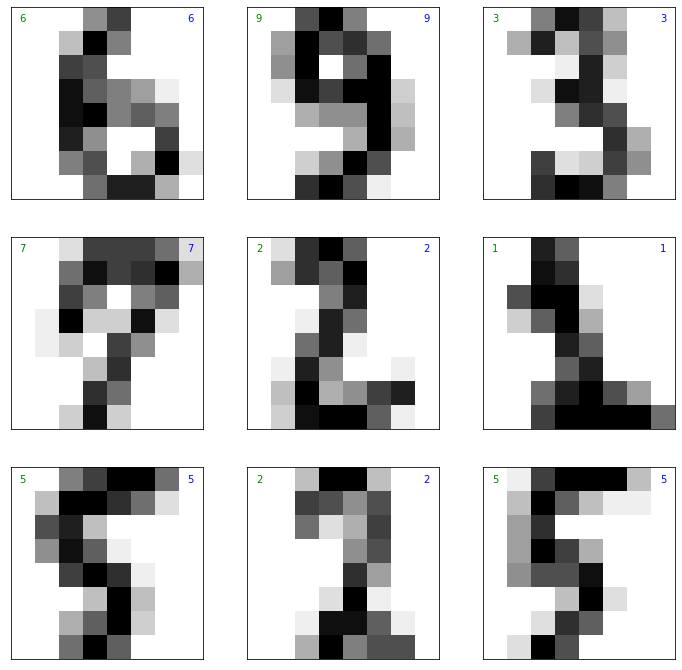

In [54]:
mostar_resultados(digits, model = KNeighborsClassifier(), nx = 3, ny = 3, label = "correctos")

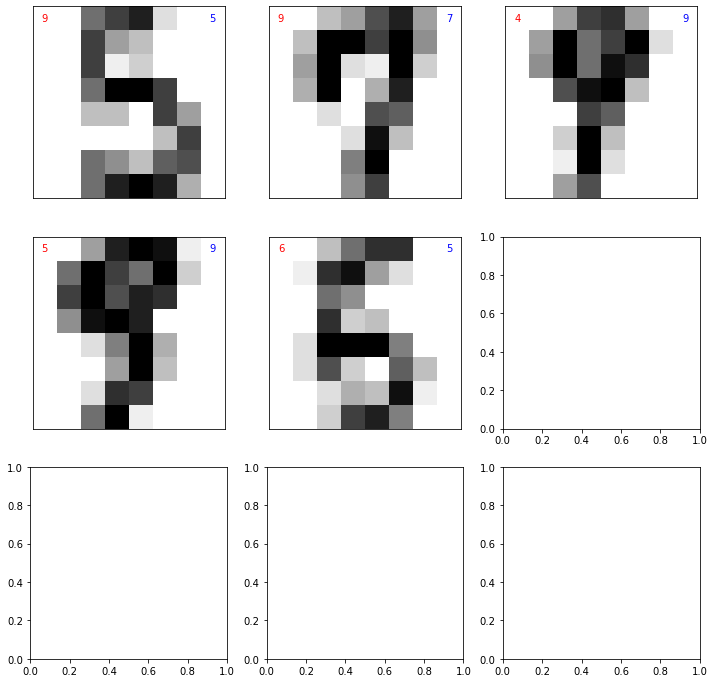

In [55]:
mostar_resultados(digits, model = KNeighborsClassifier(), nx = 3, ny = 3, label = "incorrectos")

**Cuando el valor predicho y original son distintos,  ¿Por qué ocurren estas fallas?**

Se pude notar que parte de los errores son intrínsecas de los números, por ejemplo, es común confundir un 1 con un 7 o un 5 con un 6 a simple vista por su forma similar. Otro error que se repite es con el 9, al parecer cuando la imagen no es de gran calidad es fácil que la forma del 9 se convierta en algo poco distinguible. Sin embargo, la cantidad de errores es ad hoc a las métricas obtenidos, sobre todo sabiendo que las métricas con el nuevo dataset son un poco menores a las métricas con el dataset original.

### Ejercicio 7
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.